In [1]:
# To import wine data
import pandas as pd
wine_df = pd.read_csv("/Users/dylanyap/Downloads/winequality-white.csv",sep=';')

In [2]:
# To view first 5 rows
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# To get number of rows
len(wine_df)

4898

In [4]:
# To get basic statistic about wine data
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# To check missing data
print(wine_df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


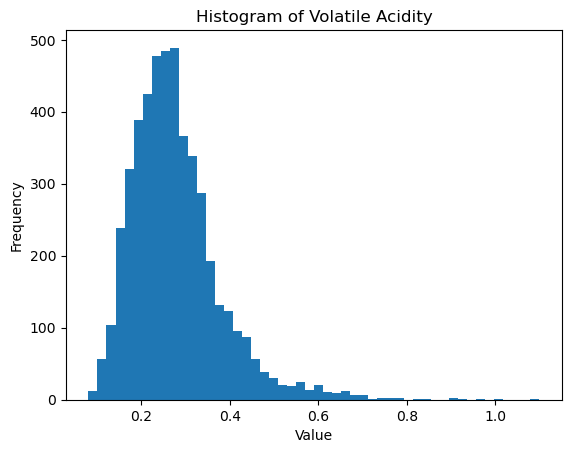

In [6]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(wine_df['volatile acidity'], bins=50)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Volatile Acidity')

# Show the plot
plt.show()

In [7]:
from scipy.stats import kurtosis
from scipy.stats import skew

#To check the skewness and kurtosis of the independent variable
skew_va = skew(wine_df['volatile acidity'])
kurt_va = kurtosis(wine_df['volatile acidity'])
skew_ca = skew(wine_df['citric acid'])
kurt_ca = kurtosis(wine_df['citric acid'])
skew_rs = skew(wine_df['residual sugar'])
kurt_rs = kurtosis(wine_df['residual sugar'])
skew_fsd = skew(wine_df['free sulfur dioxide'])
kurt_fsd= kurtosis(wine_df['free sulfur dioxide'])

data = [['volatile acidity',skew_va,kurt_va],['citric acid',skew_ca,kurt_ca],['residual sugar',skew_rs,kurt_rs],['free sulfur dioxide',skew_fsd,kurt_fsd]]
normaldist = pd.DataFrame(data, columns =["Chemical","Skew","Kurtois"])
normaldist

,Chemical,Skew,Kurtois
0,volatile acidity,1.576497,5.085205
1,citric acid,1.281528,6.167374
2,residual sugar,1.076764,3.465054
3,free sulfur dioxide,1.406314,11.453416


In [8]:
from scipy import stats

#To carry out shapiro testing for normality
p_value_a = "{:.4f}".format(stats.shapiro(wine_df['volatile acidity'])[1])
p_value_b = "{:.4f}".format(stats.shapiro(wine_df['citric acid'])[1])
p_value_c = "{:.4f}".format(stats.shapiro(wine_df['residual sugar'])[1])
p_value_d = "{:.4f}".format(stats.shapiro(wine_df['free sulfur dioxide'])[1])


data = [["volatile acidity",p_value_a],["citric acid",p_value_b],["residual sugar",p_value_c],["free sulfur dioxide",p_value_d]]
p_value = pd.DataFrame(data, columns =["Chemical","P-value"])
p_value

,Chemical,P-value
0,volatile acidity,0.0000
1,citric acid,0.0000
2,residual sugar,0.0000
3,free sulfur dioxide,0.0000


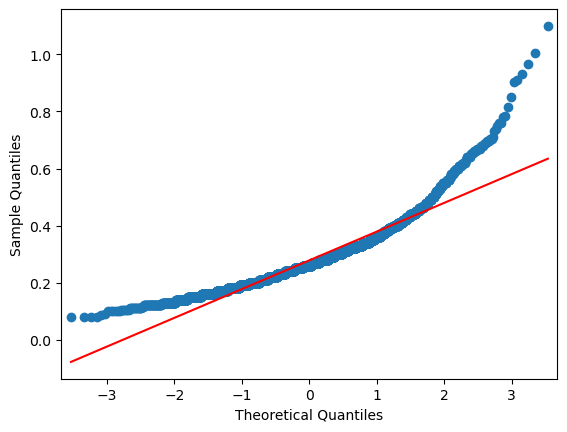

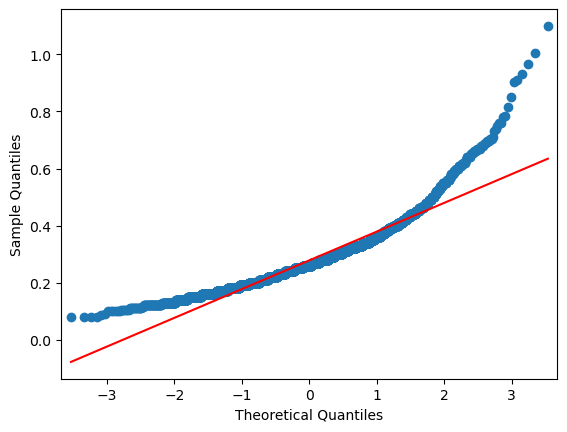

In [9]:
import statsmodels.graphics.gofplots as sm

#To plot qq plot of the variables
sm.ProbPlot(wine_df['volatile acidity']).qqplot(line='s')

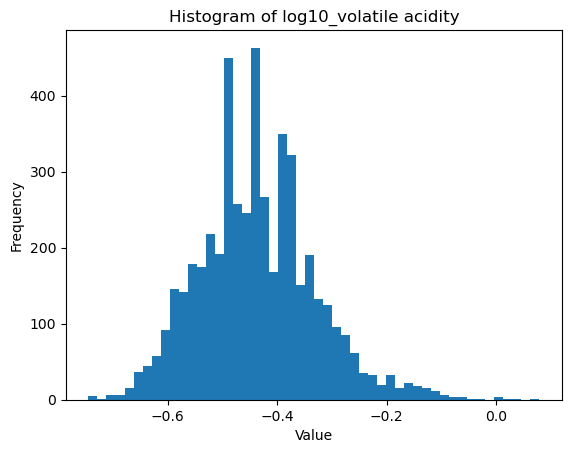

In [10]:
import numpy as np

wine_df["log10_volatile acidity"] = np.log10(wine_df["volatile acidity"]+0.1)

# Plot the histogram
plt.hist(wine_df['log10_volatile acidity'], bins=50)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of log10_volatile acidity')

# Show the plot
plt.show()

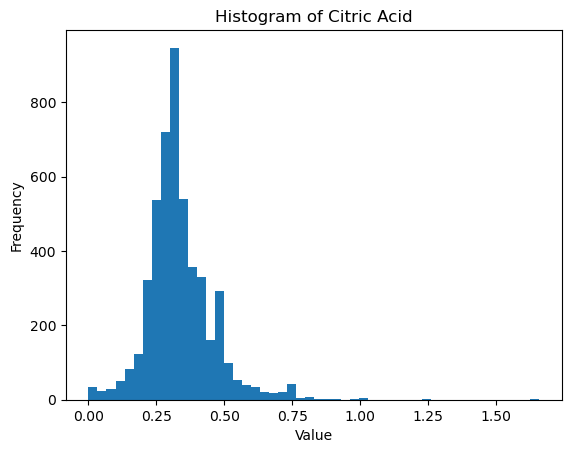

In [11]:
# Plot the histogram
plt.hist(wine_df['citric acid'], bins=50)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Citric Acid')

# Show the plot
plt.show()

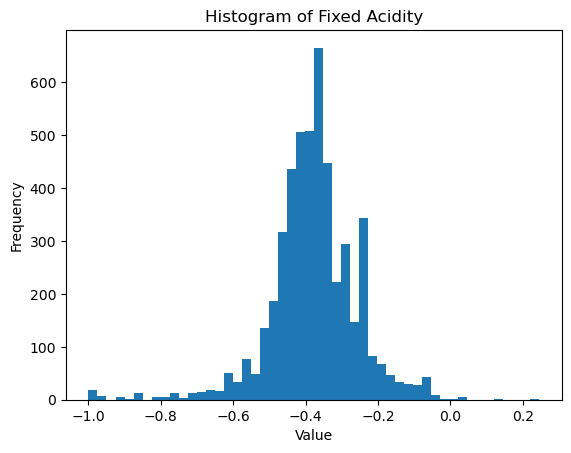

In [12]:
wine_df["log10_citric acid"] = np.log10(wine_df["citric acid"]+0.1)

# Plot the histogram
plt.hist(wine_df['log10_citric acid'], bins=50)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Fixed Acidity')

# Show the plot
plt.show()

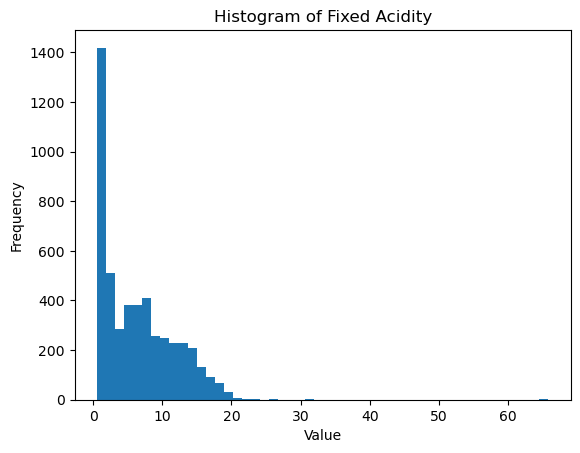

In [13]:
# Plot the histogram
plt.hist(wine_df['residual sugar'], bins=50)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Fixed Acidity')

# Show the plot
plt.show()

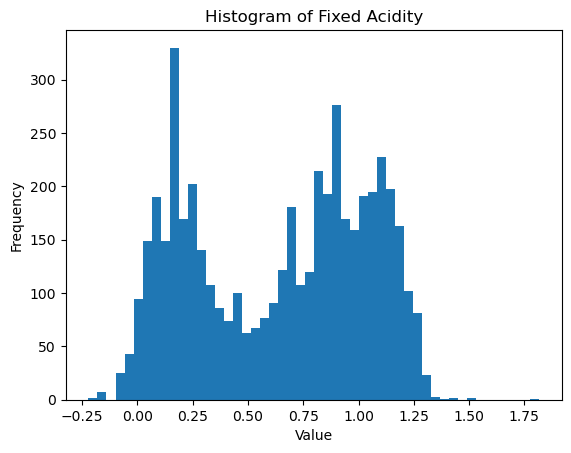

In [14]:
wine_df["log10_residual sugar"] = np.log10(wine_df["residual sugar"])

# Plot the histogram
plt.hist(wine_df['log10_residual sugar'], bins=50)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Fixed Acidity')

# Show the plot
plt.show()

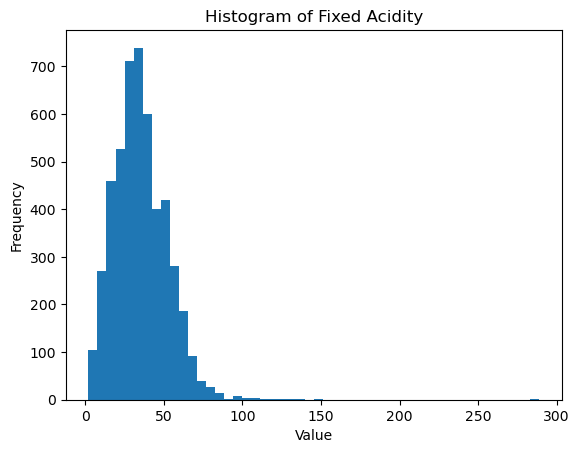

In [15]:
# Plot the histogram
plt.hist(wine_df['free sulfur dioxide'], bins=50)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Fixed Acidity')

# Show the plot
plt.show()

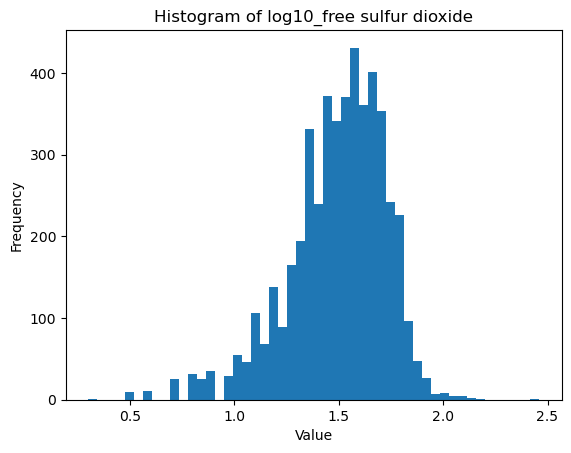

In [16]:
wine_df["log10_free sulfur dioxide"] = np.log10(wine_df["free sulfur dioxide"])

# Plot the histogram
plt.hist(wine_df['log10_free sulfur dioxide'], bins=50)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of log10_free sulfur dioxide')

# Show the plot
plt.show()

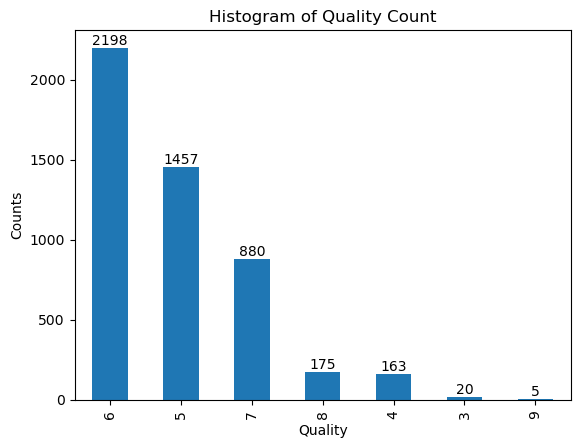

In [17]:
# Get count of each quality (dependent variable)
counts = wine_df['quality'].value_counts()
counts.plot.bar()

# Add labels and title
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.title('Histogram of Quality Count')

# Label each bar with its value
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the histogram
plt.show()

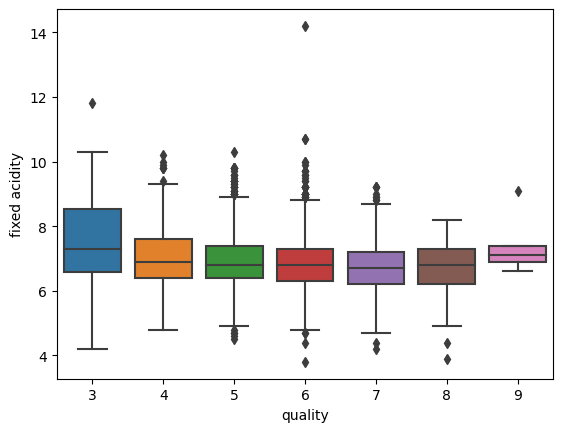

In [18]:
import seaborn as sns
sns.boxplot(x=wine_df['quality'], y=wine_df['fixed acidity'], data=wine_df)
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#To find the VIF value for checking multicollinearity
vif_data = wine_df.drop("quality",axis=1)
# vif_data = vif_data.drop("a",axis=1)
X = vif_data.assign(const=1)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

fixed acidity                2.748015e+00
volatile acidity             2.612348e+01
citric acid                  1.238772e+01
residual sugar               2.284730e+01
chlorides                    1.238910e+00
free sulfur dioxide          6.829704e+00
total sulfur dioxide         2.400290e+00
density                      2.951485e+01
pH                           2.226122e+00
sulphates                    1.140006e+00
alcohol                      7.871023e+00
log10_volatile acidity       2.593003e+01
log10_citric acid            1.312046e+01
log10_residual sugar         8.164645e+00
log10_free sulfur dioxide    6.731851e+00
const                        3.198669e+06
dtype: float64

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#To find the VIF value for checking multicollinearity
vif_data = wine_df.drop("quality",axis=1)
vif_data = vif_data.drop("density",axis=1)
X = vif_data.assign(const=1)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

fixed acidity                   1.392380
volatile acidity               25.672721
citric acid                    12.386256
residual sugar                  8.163001
chlorides                       1.204698
free sulfur dioxide             6.825012
total sulfur dioxide            2.267834
pH                              1.348363
sulphates                       1.060582
alcohol                         1.739235
log10_volatile acidity         25.607897
log10_citric acid              13.119530
log10_residual sugar            7.978549
log10_free sulfur dioxide       6.703867
const                        2581.409588
dtype: float64

In [21]:
import statsmodels.api as smi

# Define the predictor variables and response variable
X = wine_df.drop('quality', axis=1)  
X = X.drop('density', axis=1) # eliminate from multicollinearity result
y = wine_df['quality']  

# Add a constant term to the predictor variables
X = smi.add_constant(X)

# Create and fit the model
model = smi.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:40:30   Log-Likelihood:                -5405.2
No. Observations:                4898   AIC:                         1.084e+04
Df Residuals:                    4883   BIC:                         1.094e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

df = wine_df.drop('quality', axis=1)  
df = df.drop('density', axis=1) # eliminate from multicollinearity result

# Perform the KMO test
kmo_all, kmo_model = calculate_kmo(df)
print('KMO:', kmo_model)

# Perform the Bartlett's test
chi2, p_value = calculate_bartlett_sphericity(df)
print('Bartlett:', p_value)

KMO: 0.6164366907454452
Bartlett: 0.0


/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [23]:
# Split into dependent and independent variable
X = wine_df.drop('quality', axis=1)  
y = wine_df['quality']  

In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# define pipeline for data balancing if more than 1 resampling strategy is used
sampling_strategy = {6: 2200, 5: 1500, 7: 1500, 8: 1000, 4: 1000, 3: 500, 9: 500}
over = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=0)
under = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=0)
steps = [('u', under), ('o', over)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X, y)

/opt/anaconda3/lib/python3.9/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (2200) in class 6 will be larger than the number of samples in the majority class (class #6 -> 2198)
  warnings.warn(


In [25]:
from collections import Counter
counter_before = Counter(y)
print("Distribution before resampling: ", counter_before)
counter_after = Counter(y_resampled)
print("Distribution before resampling: ", counter_after)

Distribution before resampling:  Counter({6: 2198, 5: 1457, 7: 880, 8: 175, 4: 163, 3: 20, 9: 5})
Distribution before resampling:  Counter({6: 2200, 3: 2200, 5: 1500, 7: 1500, 8: 1000, 4: 1000, 9: 500})


In [29]:
# To select the most significant predictors from Multivariate Data Analysis
X_engineered = X_resampled[['fixed acidity','log10_volatile acidity','log10_residual sugar','log10_free sulfur dioxide','sulphates','alcohol']]

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, max_depth= 30,min_samples_split=3,random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8742424242424243


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_engineered, y_resampled, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, max_depth= 30,min_samples_split=3,random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8712121212121212


In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, max_depth= 30,min_samples_split=3,random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6959183673469388


In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_engineered, y_resampled, test_size=0.2, random_state=42)

# Convert the data into a DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the hyperparameters for XGBoost
params = {
    'max_depth': 10,
    'n_estimators': 1000,
    'eta': 0.7,
    'objective': 'multi:softmax',
    'num_class': 10,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 1
}

# Train the XGBoost model
xgb_classifier = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(dtest)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[13:38:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Accuracy: 0.8414141414141414


In [55]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=42)

# Convert the data into a DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the hyperparameters for XGBoost
params = {
    'max_depth': 10,
    'n_estimators': 1000,
    'eta': 0.7,
    'objective': 'multi:softmax',
    'num_class': 10,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 1
}

# Train the XGBoost model
xgb_classifier = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(dtest)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[13:38:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Accuracy: 0.6571428571428571


fixed acidity: 0.1683714224469668
log10_volatile acidity: 0.14834795921212365
log10_residual sugar: 0.17014297062521572
log10_free sulfur dioxide: 0.2005927659164033
sulphates: 0.13398252185954548
alcohol: 0.1785623599397451


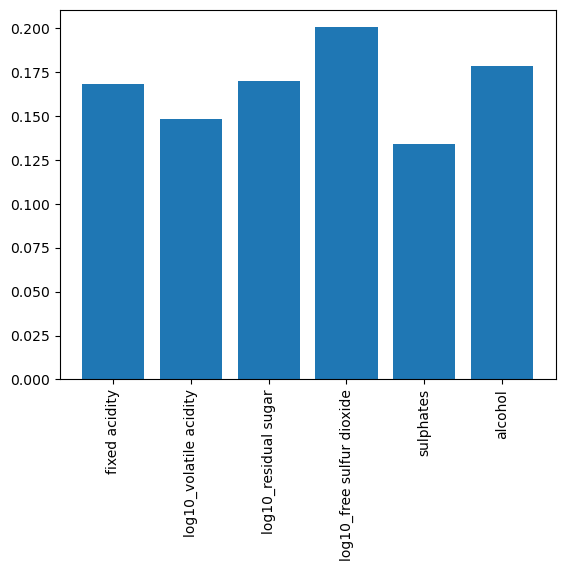

In [33]:
import matplotlib.pyplot as plt

# TO show importance of independent variables
importances = rf.feature_importances_
for feature, importance in zip(X_engineered.columns, importances):
    print(f"{feature}: {importance}")

# visualize feature importance scores
plt.bar(X_engineered.columns, importances)
plt.xticks(rotation=90)
plt.show()